In [2]:
# Current Feedback

# Question is good, try to tell the story behind it by addressing which features are most important, what should the patient know, and how does the patient decrease probability of being sick

# Explain the differences between Recall and Precision in this testing scenario and provide a model that favors each

In [3]:
# To Do List

# Adjust the presentation based on the updated code

In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

In [5]:
# Reading the data and adding column names
columns = [
    'ID', 'Diagnosis', 
    'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 
    'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
    'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 
    'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension',
    'largest_radius', 'largest_texture', 'largest_perimeter', 'largest_area', 'largest_smoothness', 
    'largest_compactness', 'largest_concavity', 'largest_concave_points', 'largest_symmetry', 'largest_fractal_dimension'
]
df = pd.read_csv('wdbc.data', names = columns)

# Changing the Diagnosis to 0s and 1s for readability
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Checking to see if there is any missing data
print(f'There are {len(df[df.isna().any(axis=1)])} rows with missing data')

# Printing the top of the dataframe
df.head()

There are 0 rows with missing data


,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,largest_radius,largest_texture,largest_perimeter,largest_area,largest_smoothness,largest_compactness,largest_concavity,largest_concave_points,largest_symmetry,largest_fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
prob_malignant = df['Diagnosis'].mean()
print(f"Probability that Diagnosis == 1 (Malignant): {prob_malignant:.4f}")
print(f"Probability that Diagnosis == 0 (Benign): {1 - prob_malignant:.4f}")

Probability that Diagnosis == 1 (Malignant): 0.3726
Probability that Diagnosis == 0 (Benign): 0.6274


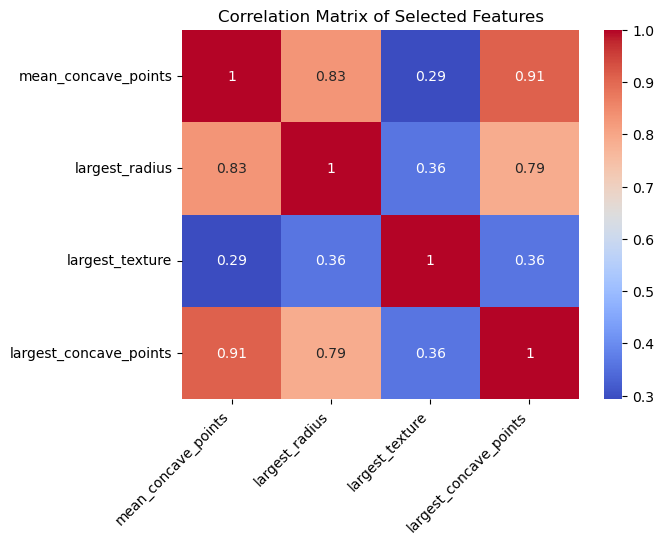

In [7]:
# Test for multicolinearity
selected_features = ['mean_concave_points', 'largest_radius', 'largest_texture', 'largest_concave_points']

corr_matrix = df[selected_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix of Selected Features")
plt.savefig('correlation_matrix.png')
plt.show()

Diagnosis                 1.000000
largest_concave_points    0.793566
largest_perimeter         0.782914
mean_concave_points       0.776614
largest_radius            0.776454
mean_perimeter            0.742636
largest_area              0.733825
mean_radius               0.730029
mean_area                 0.708984
mean_concavity            0.696360
Name: Diagnosis, dtype: float64


C:\Users\jakem\AppData\Local\Temp\ipykernel_15396\2095508079.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Set2")


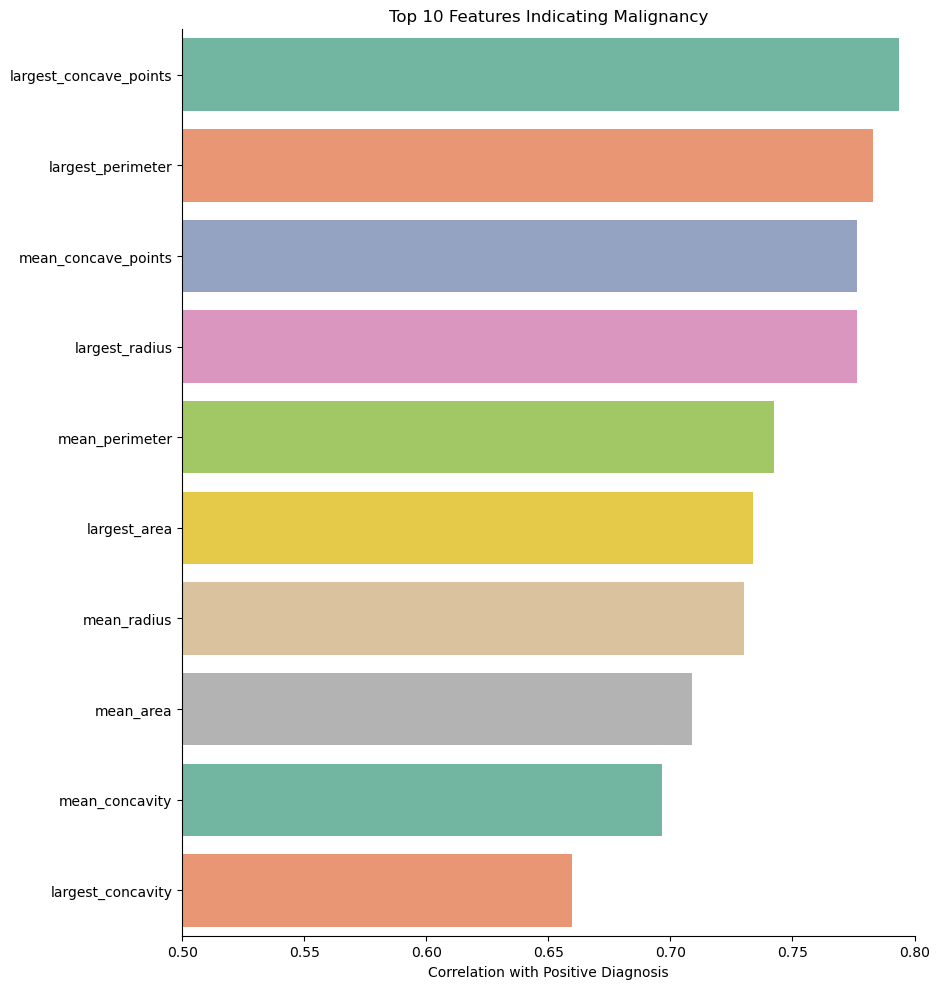

In [8]:
# Identify the top 10 features in the data set that correlate to a malignant diagnosis
diagnosis_corr = df.drop(columns=['ID']).corr()['Diagnosis'].sort_values(ascending=False)
print(diagnosis_corr.head(10))

# Bar plot of top 10 positively correlated features with Diagnosis
top_features = diagnosis_corr[1:11]  # skip the first one (perfect correlation with itself)
plt.figure(figsize=(9.5, 10))
sns.barplot(x=top_features.values, y=top_features.index, palette="Set2")
plt.title("Top 10 Features Indicating Malignancy")
plt.xlabel("Correlation with Positive Diagnosis")
plt.ylabel("")

plt.xlim(0.5, 0.8)
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()


In [9]:
# Creating the X and y variables
X = df.drop(columns=['Diagnosis', 'ID'])
y = df['Diagnosis']

# Creating a train, validation, and test dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Resampled training set distribution:
 Diagnosis
1    280
0    280
Name: count, dtype: int64


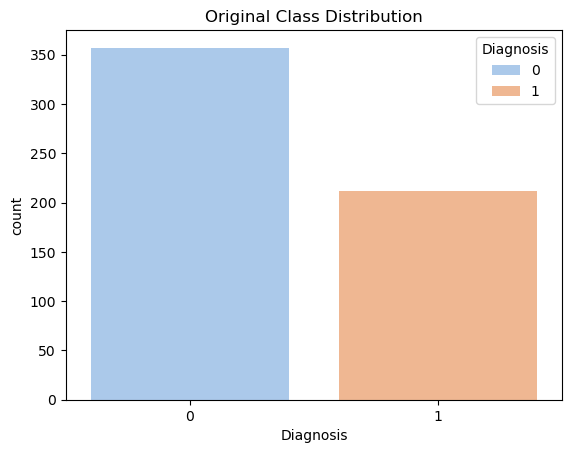

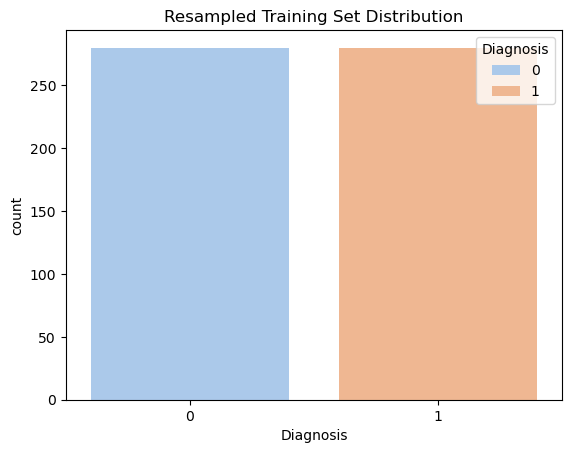

In [10]:
# Choose OverSampler or UnderSampler (OverSampler tends to work better for small datasets)
ros = RandomOverSampler(random_state=42)
# rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Confirm the new balance
print("\nResampled training set distribution:\n", y_resampled.value_counts())

sns.countplot(x=y, hue=y, palette='pastel')
plt.title('Original Class Distribution')
plt.savefig('Original Class Distribution.png')
plt.show()

sns.countplot(x=y_resampled, hue=y_resampled, palette='pastel')
plt.title('Resampled Training Set Distribution')
plt.savefig('Resampled Training Set Distribution.png')
plt.show()

In [11]:
# Creating the logistic regression model with LASSO
lasso_model = LogisticRegression(random_state=42, penalty='l1', solver='saga', C=0.05, max_iter=10000) # C doesn't have to be used but reduces the amount of features selected
lasso_model.fit(X_resampled_scaled, y_resampled)

# Showing the coefficients
cfs = lasso_model.coef_[0]
sf = X.columns[cfs != 0]
print("Selected features:", sf)

# Predict probabilities for the positive class
y_pred_prob_l = lasso_model.predict_proba(X_val_scaled)[:, 1]
y_pred_l = lasso_model.predict(X_val_scaled)

# Calculate Accuracy
l_acc = accuracy_score(y_val, y_pred_l)
print(f"Accuracy (Validation) - Lasso: {l_acc:.4f}")

# Calculate AUC score
l_auc = roc_auc_score(y_val, y_pred_prob_l)
print(f"AUC score (validation) - Lasso: {l_auc:.4f}")

#Calculate Precision
l_pre = precision_score(y_val, y_pred_l, average='macro')
print(f"Precision score (Validation) - Lasso: {l_pre:.4f}")

#Calculate Recall
l_rcl = recall_score(y_val, y_pred_l, average='macro')
print(f"Recall (Validation) - Lasso: {l_rcl:.4f}")


Selected features: Index(['mean_texture', 'mean_concave_points', 'se_radius', 'largest_radius',
       'largest_texture', 'largest_concave_points', 'largest_symmetry'],
      dtype='object')
Accuracy (Validation) - Lasso: 0.9298
AUC score (validation) - Lasso: 0.9972
Precision score (Validation) - Lasso: 0.9091
Recall (Validation) - Lasso: 0.9487


In [12]:
# Creating the logistic regression model with RIDGE
ridge_model = LogisticRegression(random_state=42, penalty='l2', solver='saga', C=0.05, max_iter=10000)
ridge_model.fit(X_resampled_scaled, y_resampled)

# Predict probabilities for the positive class
y_pred_prob_r = ridge_model.predict_proba(X_val_scaled)[:, 1]
y_pred_r = ridge_model.predict(X_val_scaled)

# Calculate Accuracy
r_acc = accuracy_score(y_val, y_pred_r)
print(f"Accuracy (Validation) - Ridge: {r_acc:.4f}")

# Calculate AUC score
r_auc = roc_auc_score(y_val, y_pred_prob_r)
print(f"AUC score (validation) - Ridge: {r_auc:.4f}")

#Calculate Precision
r_pre = precision_score(y_val, y_pred_r, average='macro')
print(f"Precision score (Validation) - Ridge: {r_pre:.4f}")

#Calculate Recall
r_rcl = recall_score(y_val, y_pred_r, average='macro')
print(f"Recall (Validation) - Ridge: {r_rcl:.4f}")

Accuracy (Validation) - Ridge: 0.9298
AUC score (validation) - Ridge: 1.0000
Precision score (Validation) - Ridge: 0.9091
Recall (Validation) - Ridge: 0.9487


In [13]:
# Training Decision Tree Model using a Grid Search
tree_model = DecisionTreeClassifier(random_state=42)
md = {'max_depth': range(1, 16)}

# Doing Search with Cross Validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=md, cv=5, scoring='accuracy')

# Fit the model and best parameters
grid_search.fit(X_resampled_scaled, y_resampled)
best_md = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_
print(f"Best max_depth: {best_md}")

# Make Predictions
y_pred_t = best_model.predict(X_val_scaled)
y_pred_prob_t = best_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
t_accuracy = accuracy_score(y_val, y_pred_t)
t_auc = roc_auc_score(y_val, y_pred_prob_t)
t_pre = precision_score(y_val, y_pred_t, average='macro')
t_rcl = recall_score(y_val, y_pred_t, average='macro')

print(f"Recall (Validation) - Best Decision Tree: {t_rcl:.4f}")
print(f"Precision score (Validation) - Best Decision Tree: {t_pre:.4f}")
print(f"Accuracy (Validation) - Best Decision Tree: {t_accuracy:.4f}")
print(f"AUC score (Validation) - Best Decision Tree: {t_auc:.4f}")

Best max_depth: 5
Recall (Validation) - Best Decision Tree: 0.9615
Precision score (Validation) - Best Decision Tree: 0.9286
Accuracy (Validation) - Best Decision Tree: 0.9474
AUC score (Validation) - Best Decision Tree: 0.9615


In [14]:
# Training K-NN using a grid search
knn_model = KNeighborsClassifier()
nn = {'n_neighbors': range(2, 21)}

# Doing Grid Search with Cross Validation
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=nn, cv=5, scoring='accuracy')

# Fit the model and get best parameters
grid_search_knn.fit(X_resampled_scaled, y_resampled)
best_nn = grid_search_knn.best_params_['n_neighbors']
best_knn_model = grid_search_knn.best_estimator_
print(f"Best number of neighbors found: {best_nn}")

# Predict with the best model
y_pred_knn = best_knn_model.predict(X_val_scaled)
y_pred_prob_knn = best_knn_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
knn_acc = accuracy_score(y_val, y_pred_knn)
knn_auc = roc_auc_score(y_val, y_pred_prob_knn)
knn_pre = precision_score(y_val, y_pred_knn, average='macro')
knn_rcl = recall_score(y_val, y_pred_knn, average='macro')

print(f"Recall (Validation) - Best kNN: {knn_rcl:.4f}")
print(f"Precision score (Validation) - Best kNN: {knn_pre:.4f}")
print(f"Accuracy (Validation) - Best kNN: {knn_acc:.4f}")
print(f"AUC score (Validation) - Best kNN: {knn_auc:.4f}")

Best number of neighbors found: 5
Recall (Validation) - Best kNN: 0.9744
Precision score (Validation) - Best kNN: 0.9500
Accuracy (Validation) - Best kNN: 0.9649
AUC score (Validation) - Best kNN: 0.9986


In [15]:
# Creating the forest model using grid search
rf_model = RandomForestClassifier(random_state=42)
ne = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Doing Grid Search with Cross Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=ne, cv=5, scoring='accuracy')

# Fit the model and get best parameters
grid_search_rf.fit(X_resampled_scaled, y_resampled)
best_ne = grid_search_rf.best_params_['n_estimators']
best_rf_model = grid_search_rf.best_estimator_
print(f"Best number of estimators found: {best_ne}")

# Predict
y_pred_rf = best_rf_model.predict(X_val_scaled)
y_pred_prob_rf = best_rf_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
rf_acc = accuracy_score(y_val, y_pred_rf)
rf_auc = roc_auc_score(y_val, y_pred_prob_rf)
rf_pre = precision_score(y_val, y_pred_rf, average='macro')
rf_rcl = recall_score(y_val, y_pred_rf, average='macro')

print(f"Recall (Validation) - Best Random Forest: {rf_rcl:.4f}")
print(f"Precision score (Validation) - Best Random Forest: {rf_pre:.4f}")
print(f"Accuracy (Validation) - Best Random Forest: {rf_acc:.4f}")
print(f"AUC score (Validation) - Best Random Forest: {rf_auc:.4f}")

Best number of estimators found: 50
Recall (Validation) - Best Random Forest: 0.9487
Precision score (Validation) - Best Random Forest: 0.9091
Accuracy (Validation) - Best Random Forest: 0.9298
AUC score (Validation) - Best Random Forest: 1.0000


In [16]:
# Creating the SVM model
svm_model = SVC(random_state=42, probability=True)
grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Doing Grid Search with Cross Validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=grid_svm, cv=5, scoring='accuracy')

# Fitting the model and getting parameters
grid_search_svm.fit(X_resampled_scaled, y_resampled)
best_svm_params = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_
print(f"Best SVM Parameters found: {best_svm_params}")

# Predicting
y_pred_svm = best_svm_model.predict(X_val_scaled)
y_pred_prob_svm = best_svm_model.predict_proba(X_val_scaled)[:, 1]

# Evaluating
svm_acc = accuracy_score(y_val, y_pred_svm)
svm_auc = roc_auc_score(y_val, y_pred_prob_svm)
svm_pre = precision_score(y_val, y_pred_svm, average='macro')
svm_rcl = recall_score(y_val, y_pred_svm, average='macro')

print(f"Recall (Validation) - Best SVM: {svm_rcl:.4f}")
print(f"Precision score (Validation) - Best SVM: {svm_pre:.4f}")
print(f"Accuracy (Validation) - Best SVM: {svm_acc:.4f}")
print(f"AUC score (Validation) - Best SVM: {svm_auc:.4f}")


Best SVM Parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Recall (Validation) - Best SVM: 0.9744
Precision score (Validation) - Best SVM: 0.9500
Accuracy (Validation) - Best SVM: 0.9649
AUC score (Validation) - Best SVM: 1.0000


In [17]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

# Perform Grid Search with Cross Validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose = 1) # Added verbose to show combinations

# Fit the model with grid search and get parameters
grid_search_gb.fit(X_resampled_scaled, y_resampled)
best_gb_params = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_
print(f"Best Gradient Boosting Parameters found: {best_gb_params}")

# Predicting
y_pred_gb = best_gb_model.predict(X_val_scaled)
y_pred_prob_gb = best_gb_model.predict_proba(X_val_scaled)[:, 1]

# Evaluating
gb_acc = accuracy_score(y_val, y_pred_gb)

gb_auc = roc_auc_score(y_val, y_pred_prob_gb)

gb_pre = precision_score(y_val, y_pred_gb, average='macro')

gb_rcl = recall_score(y_val, y_pred_gb, average='macro')

print(f"Recall (Validation) - Best Gradient Boosting: {gb_rcl:.4f}")
print(f"Accuracy (Validation) - Best Gradient Boosting: {gb_acc:.4f}")
print(f"AUC score (Validation) - Best Gradient Boosting: {gb_auc:.4f}")
print(f"Precision Score (Validation) - Best Gradient Boosting: {gb_pre:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Gradient Boosting Parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Recall (Validation) - Best Gradient Boosting: 0.9487
Accuracy (Validation) - Best Gradient Boosting: 0.9298
AUC score (Validation) - Best Gradient Boosting: 1.0000
Precision Score (Validation) - Best Gradient Boosting: 0.9091


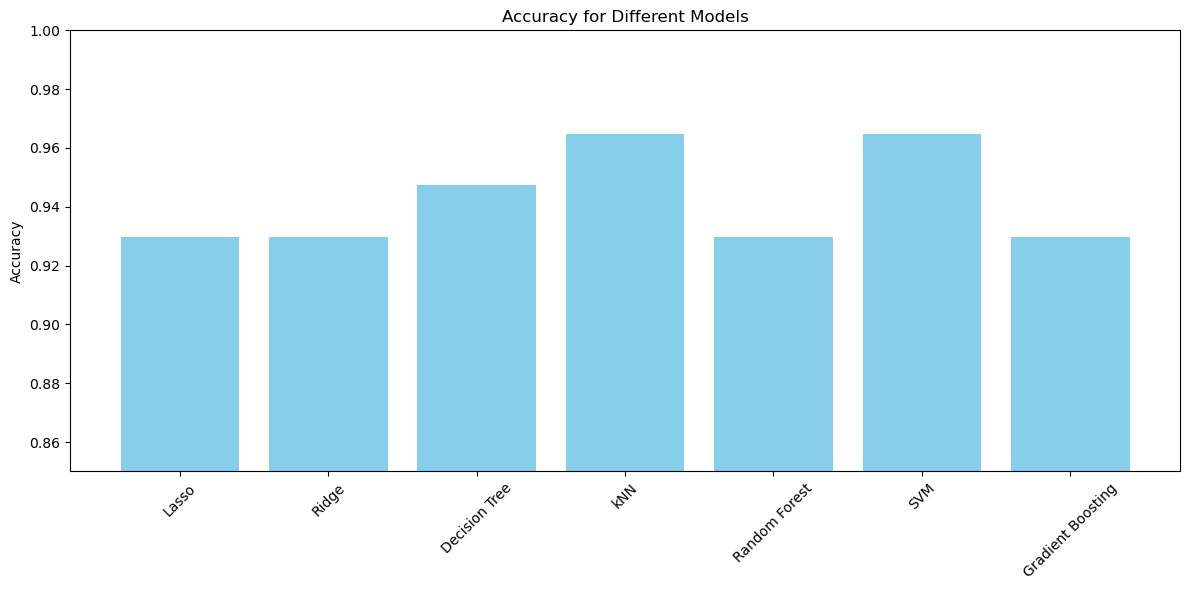

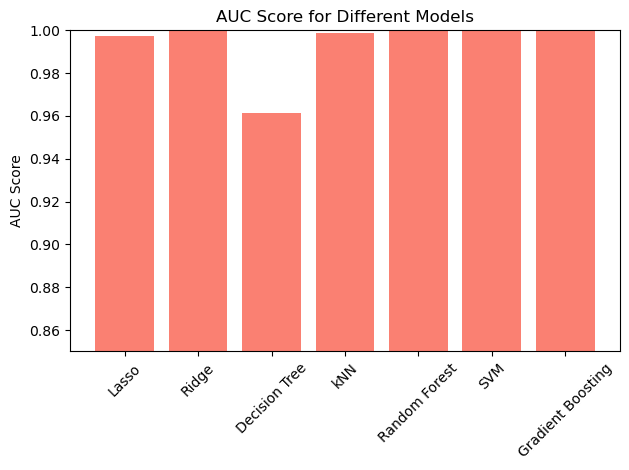

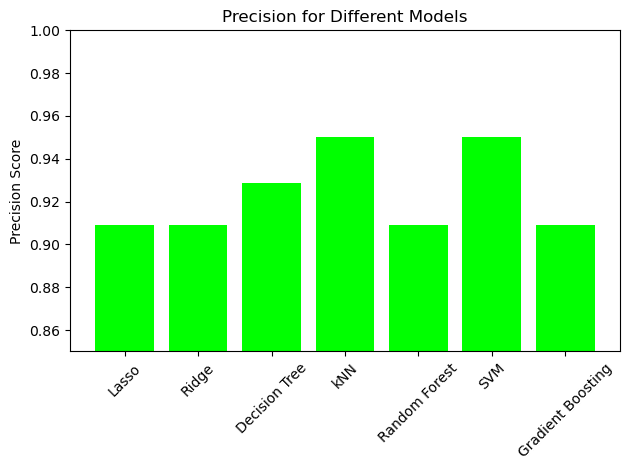

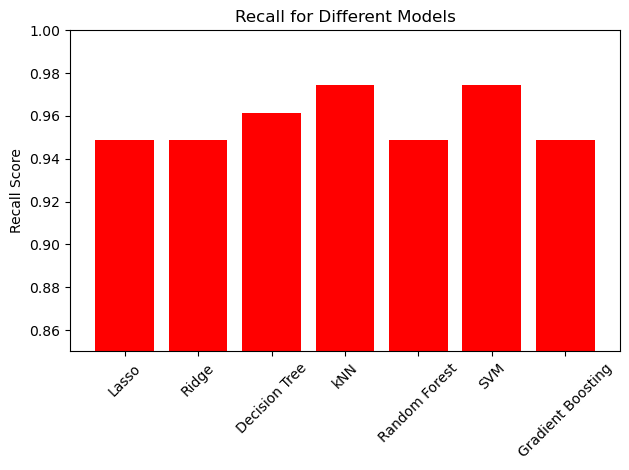

In [18]:
# Showing the Scores for all the models
models = ["Lasso", "Ridge", "Decision Tree", "kNN", "Random Forest", "SVM", "Gradient Boosting"]
all_acc = [l_acc, r_acc, t_accuracy, knn_acc, rf_acc, svm_acc, gb_acc]
all_auc = [l_auc, r_auc, t_auc, knn_auc, rf_auc, svm_auc, gb_auc]
all_pre = [l_pre, r_pre, t_pre, knn_pre, rf_pre, svm_pre, gb_pre]
all_rcl = [l_rcl, r_rcl, t_rcl, knn_rcl, rf_rcl, svm_rcl, gb_rcl]
# Creating the Plots
x = np.arange(len(models))
plt.figure(figsize=(12, 6))

# Accuracy
plt.plot(1, 4, 1)  
plt.bar(x, all_acc, color='skyblue')
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.ylim(0.85, 1)
plt.tight_layout()
plt.show()

# AUC
plt.plot(1, 4, 1)
plt.bar(x, all_auc, color='salmon')
plt.xticks(x, models, rotation=45)
plt.ylabel('AUC Score')
plt.title('AUC Score for Different Models')
plt.ylim(0.85, 1)
plt.tight_layout()
plt.show()

# Precision
plt.plot(1, 4, 3)
plt.bar(x, all_pre, color='lime')
plt.xticks(x, models, rotation=45)
plt.ylabel('Precision Score')
plt.title('Precision for Different Models')
plt.ylim(0.85, 1)

plt.tight_layout()
plt.show()

# Recall
plt.plot(1, 4, 4)
plt.bar(x, all_rcl, color='red')
plt.xticks(x, models, rotation=45)
plt.ylabel('Recall Score')
plt.title('Recall for Different Models')
plt.ylim(0.85, 1)


plt.tight_layout()
plt.show()

In [19]:
# Predict probabilities for the positive class
y_pred_prob_l = lasso_model.predict_proba(X_test_scaled)[:, 1]
y_pred_l = lasso_model.predict(X_test_scaled)

# Calculate Accuracy
l_acc = accuracy_score(y_test, y_pred_l)
print(f"Accuracy (Validation) - Lasso: {l_acc:.4f}")

# Calculate AUC score
l_auc = roc_auc_score(y_test, y_pred_prob_l)
print(f"AUC score (validation) - Lasso: {l_auc:.4f}")

#Calculate Precision
l_pre = precision_score(y_test, y_pred_l, average='macro')
print(f"Precision score (Validation) - Lasso: {l_pre:.4f}")

#Calculate Recall
l_rcl = recall_score(y_test, y_pred_l, average='macro')
print(f"Recall (Validation) - Lasso: {l_rcl:.4f}")

Accuracy (Validation) - Lasso: 0.9474
AUC score (validation) - Lasso: 1.0000
Precision score (Validation) - Lasso: 0.9318
Recall (Validation) - Lasso: 0.9605


In [21]:
# Predicting
y_pred_svm = best_svm_model.predict(X_test_scaled)
y_pred_prob_svm = best_svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluating
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_prob_svm)
svm_pre = precision_score(y_test, y_pred_svm, average='macro')
svm_rcl = recall_score(y_test, y_pred_svm, average='macro')

print(f"Recall (Validation) - Best SVM: {svm_rcl:.4f}")
print(f"Precision score (Validation) - Best SVM: {svm_pre:.4f}")
print(f"Accuracy (Validation) - Best SVM: {svm_acc:.4f}")
print(f"AUC score (Validation) - Best SVM: {svm_auc:.4f}")

Recall (Validation) - Best SVM: 0.9605
Precision score (Validation) - Best SVM: 0.9318
Accuracy (Validation) - Best SVM: 0.9474
AUC score (Validation) - Best SVM: 1.0000
